# Problem Statement
My goal is to make reccomendations to clients about the factors that effect the sale price of homes. Knowing the effect of features can help clients make decisions to increase the value of thier home, and allow them to consider if they value certain features more or less than the market. I also have an optimistic goal of creating a model that will be able to predict future home prices.

In [1468]:
# Standard Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Modeling Imports
from sklearn import metrics, linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [1469]:
# Importing training data
train = pd.read_csv('./datasets/train.csv')
test = pd.read_csv('./datasets/test.csv')

In [1470]:
# Formatting columns
train.columns = [c.lower().replace(' ', '_') for c in list(train.columns)]
test.columns = [c.lower().replace(' ', '_') for c in list(test.columns)]

In [1471]:
# Creating has_garage column in each table
train['has_garage'] = np.where(train['garage_type'].notnull(), 1, 0 )
test['has_garage'] = np.where(test['garage_type'].notnull(), 1, 0 )
# Creating has_basement
train['has_bsmt'] = np.where(train['bsmt_qual'].notnull(), 1, 0 )
test['has_bsmt'] = np.where(test['bsmt_qual'].notnull(), 1, 0 )
# Creating variable for total baths
train['tot_bath'] = (train['bsmt_full_bath'] + .5 * train['bsmt_half_bath'] + 
                     train['full_bath'] + .5 * train['half_bath'])
test['tot_bath'] = (test['bsmt_full_bath'] + .5 * test['bsmt_half_bath'] + 
                     test['full_bath'] + .5 * test['half_bath'])
# imputing lot_frontage nulls
train['lot_frontage'].fillna(train['lot_frontage'].mean(), inplace = True)
test['lot_frontage'].fillna(test['lot_frontage'].mean(), inplace = True)
# Filling nulls as described in the data dictionary
train['garage_area'].fillna(value = 0.0, inplace = True)
test['garage_area'].fillna(value = 0.0, inplace = True)
train['garage_cars'].fillna(value = 0.0, inplace = True)
test['garage_cars'].fillna(value = 0.0, inplace = True)
train['total_bsmt_sf'].fillna(value = 0.0, inplace = True)
test['total_bsmt_sf'].fillna(value = 0.0, inplace = True)
train['tot_bath'].fillna(value = 0.0, inplace = True)
test['tot_bath'].fillna(value = 0.0, inplace = True)
train['mas_vnr_area'].fillna(value = 0.0, inplace = True)
test['mas_vnr_area'].fillna(value = 0.0, inplace = True)
# Creating combined porch and deck sf
train['porch_deck_sf'] = (train['open_porch_sf'] + train['wood_deck_sf'] + train['screen_porch'] +
                          train['enclosed_porch'] + train['3ssn_porch'])
test['porch_deck_sf'] = (test['open_porch_sf'] + test['wood_deck_sf'] + test['screen_porch'] +
                          test['enclosed_porch'] + test['3ssn_porch'])


In [1472]:
# Giving number ranks to the functional column
for i, func in enumerate(train['functional']):
    if func == 'Sal':
        train.loc[i, 'functional'] = 0
    elif func == 'Sev':
        train.loc[i, 'functional'] = 1
    elif func == 'Maj2':
        train.loc[i, 'functional'] = 2
    elif func == 'Maj1':
        train.loc[i, 'functional'] = 3
    elif func == 'Mod':
        train.loc[i, 'functional'] = 4
    elif func == 'Min2':
        train.loc[i, 'functional'] = 5
    elif func == 'Min1':
        train.loc[i,'functional'] = 6
    elif func == 'Typ':
        train.loc[i, 'functional'] = 7
        
for i, func in enumerate(test['functional']):
    if func == 'Sal':
        test.loc[i, 'functional'] = 0
    elif func == 'Sev':
        test.loc[i, 'functional'] = 1
    elif func == 'Maj2':
        test.loc[i, 'functional'] = 2
    elif func == 'Maj1':
        test.loc[i, 'functional'] = 3
    elif func == 'Mod':
        test.loc[i, 'functional'] = 4
    elif func == 'Min2':
        test.loc[i, 'functional'] = 5
    elif func == 'Min1':
        test.loc[i,'functional'] = 6
    elif func == 'Typ':
        test.loc[i, 'functional'] = 7


In [1473]:
# Giving nuber ranks to kitchen quality
for i, kit in enumerate(train['kitchen_qual']):
    if kit == 'Po':
        train.loc[i, 'kitchen_qual'] = 0
    elif kit == 'Fa':
        train.loc[i, 'kitchen_qual'] = 1
    elif kit == 'TA':
        train.loc[i, 'kitchen_qual'] = 2
    elif kit == 'Gd':
        train.loc[i, 'kitchen_qual'] = 3
    elif kit == 'Ex':
        train.loc[i, 'kitchen_qual'] = 4

        
for i, kit in enumerate(test['kitchen_qual']):
    if kit == 'Po':
        test.loc[i, 'kitchen_qual'] = 0
    elif kit == 'Fa':
        test.loc[i, 'kitchen_qual'] = 1
    elif kit == 'TA':
        test.loc[i, 'kitchen_qual'] = 2
    elif kit == 'Gd':
        test.loc[i, 'kitchen_qual'] = 3
    elif kit == 'Ex':
        test.loc[i, 'kitchen_qual'] = 4

In [1474]:
# Giving nuber ranks to exterior condition
for i, kit in enumerate(train['exter_cond']):
    if kit == 'Po':
        train.loc[i, 'exter_cond'] = 0
    elif kit == 'Fa':
        train.loc[i, 'exter_cond'] = 1
    elif kit == 'TA':
        train.loc[i, 'exter_cond'] = 2
    elif kit == 'Gd':
        train.loc[i, 'exter_cond'] = 3
    elif kit == 'Ex':
        train.loc[i, 'exter_cond'] = 4
        
for i, kit in enumerate(test['exter_cond']):
    if kit == 'Po':
        test.loc[i, 'exter_cond'] = 0
    elif kit == 'Fa':
        test.loc[i, 'exter_cond'] = 1
    elif kit == 'TA':
        test.loc[i, 'exter_cond'] = 2
    elif kit == 'Gd':
        test.loc[i, 'exter_cond'] = 3
    elif kit == 'Ex':
        test.loc[i, 'exter_cond'] = 4

In [1475]:
# Giving nuber ranks to exterior quality
for i, kit in enumerate(train['exter_qual']):
    if kit == 'Po':
        train.loc[i, 'exter_qual'] = 0
    elif kit == 'Fa':
        train.loc[i, 'exter_qual'] = 1
    elif kit == 'TA':
        train.loc[i, 'exter_qual'] = 2
    elif kit == 'Gd':
        train.loc[i, 'exter_qual'] = 3
    elif kit == 'Ex':
        train.loc[i, 'exter_qual'] = 4
        
for i, kit in enumerate(test['exter_qual']):
    if kit == 'Po':
        test.loc[i, 'exter_qual'] = 0
    elif kit == 'Fa':
        test.loc[i, 'exter_qual'] = 1
    elif kit == 'TA':
        test.loc[i, 'exter_qual'] = 2
    elif kit == 'Gd':
        test.loc[i, 'exter_qual'] = 3
    elif kit == 'Ex':
        test.loc[i, 'exter_qual'] = 4

In [1476]:
# Giving nuber ranks to heating
for i, kit in enumerate(train['heating_qc']):
    if kit == 'Po':
        train.loc[i, 'heating_qc'] = 0
    elif kit == 'Fa':
        train.loc[i, 'heating_qc'] = 1
    elif kit == 'TA':
        train.loc[i, 'heating_qc'] = 2
    elif kit == 'Gd':
        train.loc[i, 'heating_qc'] = 3
    elif kit == 'Ex':
        train.loc[i, 'heating_qc'] = 4
        
for i, kit in enumerate(test['heating_qc']):
    if kit == 'Po':
        test.loc[i, 'heating_qc'] = 0
    elif kit == 'Fa':
        test.loc[i, 'heating_qc'] = 1
    elif kit == 'TA':
        test.loc[i, 'heating_qc'] = 2
    elif kit == 'Gd':
        test.loc[i, 'heating_qc'] = 3
    elif kit == 'Ex':
        test.loc[i, 'heating_qc'] = 4

In [1477]:
# Creating variable combining the year and month sold
train['yr_mnth_sold'] = train['yr_sold'] + (train['mo_sold']/12)
test['yr_mnth_sold'] = test['yr_sold'] + (test['mo_sold']/12)

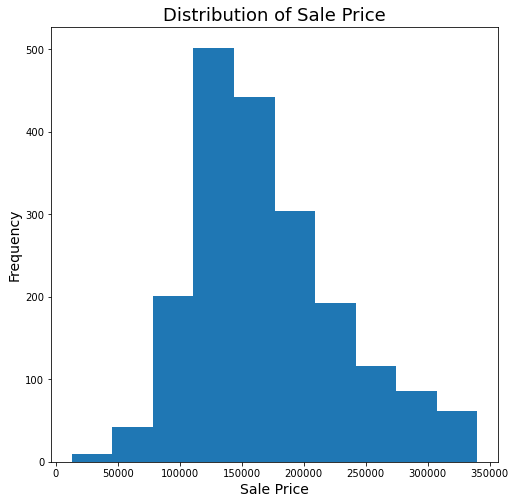

In [1478]:
# Calculating saleprice Interquartile range
sale_iq = train['saleprice'].describe()['75%'] - train['saleprice'].describe()['25%']

# Getting rid of saleprice outliers
train.drop(train.loc[train['saleprice']> train['saleprice'].describe()['75%'] + 1.5 * sale_iq].index,
           inplace = True)
train.drop(train.loc[train['saleprice']< train['saleprice'].describe()['25%'] - 1.5 * sale_iq].index,
           inplace = True)
# Plotting histogram of saleprice without outliers
plt.figure(figsize = (8,8));
plt.hist(train['saleprice'])
plt.xlabel('Sale Price', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.title('Distribution of Sale Price', fontsize = 18);

**Interpretation:** After removing outliers, the saleprice is much closer to being normally distributed. There is definitely still a positive skew, so there could be value in predicting the log of saleprice.

In [1479]:
train.loc[:,'functional'] = pd.to_numeric(train.loc[:,'functional'])
train.loc[:,'kitchen_qual'] = pd.to_numeric(train.loc[:,'kitchen_qual'])
test.loc[:,'functional'] = pd.to_numeric(test.loc[:,'functional'])
test.loc[:,'kitchen_qual'] = pd.to_numeric(test.loc[:,'kitchen_qual'])
train.loc[:,'exter_qual'] = pd.to_numeric(train.loc[:,'exter_qual'])
test.loc[:,'exter_qual'] = pd.to_numeric(test.loc[:,'exter_qual'])
train.loc[:,'exter_cond'] = pd.to_numeric(train.loc[:,'exter_cond'])
test.loc[:,'exter_cond'] = pd.to_numeric(test.loc[:,'exter_cond'])
train.loc[:,'heating_qc'] = pd.to_numeric(train.loc[:,'heating_qc'])
test.loc[:,'heating_qc'] = pd.to_numeric(test.loc[:,'heating_qc'])

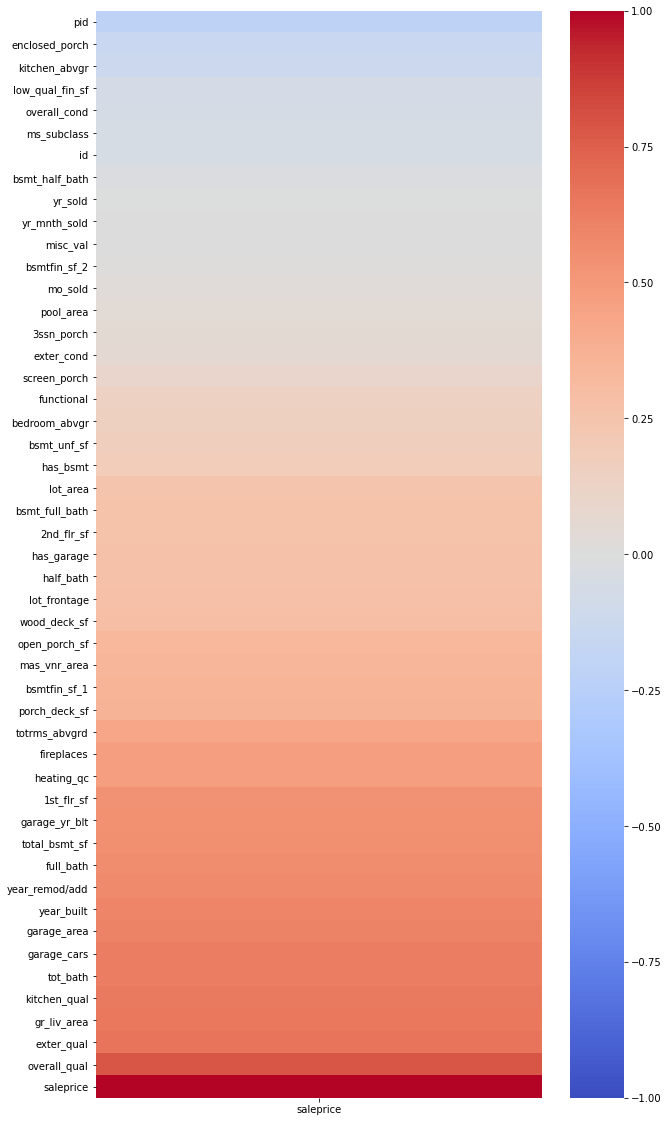

In [1480]:
# Using a heatmap to find numeric features that correlate strongly with saleprice
plt.figure(figsize = (10,20))
sns.heatmap(train.corr()[['saleprice']].sort_values('saleprice'),
            cmap = 'coolwarm', vmin = -1, vmax = 1);

**Conclusions:** This heatmap shows the numeric columns that are most correlated with saleprice. This was very useful in showing the top potential features for the model.

In [1481]:
# Separating columns for analysis
features = [ 'tot_bath', 'overall_qual', 'kitchen_qual', 'garage_area', 'lot_area', 'year_built',
            'gr_liv_area', 'total_bsmt_sf', 'year_remod/add', 'fireplaces', 'heating_qc',
            'yr_mnth_sold']
X = train[features]
X_submit = test[features]
y = train['saleprice']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .2, random_state = 123)
# Code to create dummies (commented out as no categorical data was used)
#X_train = pd.get_dummies(data = X_train, dtype = int, drop_first=True)
#X_test = pd.get_dummies(data = X_test, dtype = int, drop_first=True)
#X_submit = pd.get_dummies(data = X_submit, dtype = int, drop_first=True)
X.describe()

,tot_bath,overall_qual,kitchen_qual,garage_area,lot_area,year_built,gr_liv_area,total_bsmt_sf,year_remod/add,fireplaces,heating_qc,yr_mnth_sold
count,1957.000000,1957.000000,1957.000000,1957.000000,1957.000000,1957.000000,1957.000000,1957.000000,1957.000000,1957.000000,1957.000000,1957.000000
mean,2.171691,5.983648,2.460910,456.912621,9832.811957,1970.265713,1457.316811,1020.015841,1983.224323,0.563618,3.121104,2008.300843
std,0.788728,1.319098,0.620154,204.462436,6583.868565,29.976318,461.612533,415.516221,21.026185,0.633638,0.969973,1.302427
min,0.000000,1.000000,1.000000,0.000000,1300.000000,1872.000000,334.000000,0.000000,1950.000000,0.000000,0.000000,2006.083333
25%,1.500000,5.000000,2.000000,312.000000,7415.000000,1952.000000,1116.000000,780.000000,1963.000000,0.000000,2.000000,2007.250000
50%,2.000000,6.000000,2.000000,472.000000,9248.000000,1972.000000,1422.000000,976.000000,1991.000000,0.000000,3.000000,2008.333333
75%,2.500000,7.000000,3.000000,573.000000,11120.000000,1999.000000,1690.000000,1260.000000,2003.000000,1.000000,4.000000,2009.500000
max,7.000000,10.000000,4.000000,1418.000000,159000.000000,2010.000000,5642.000000,6110.000000,2010.000000,4.000000,4.000000,2010.583333


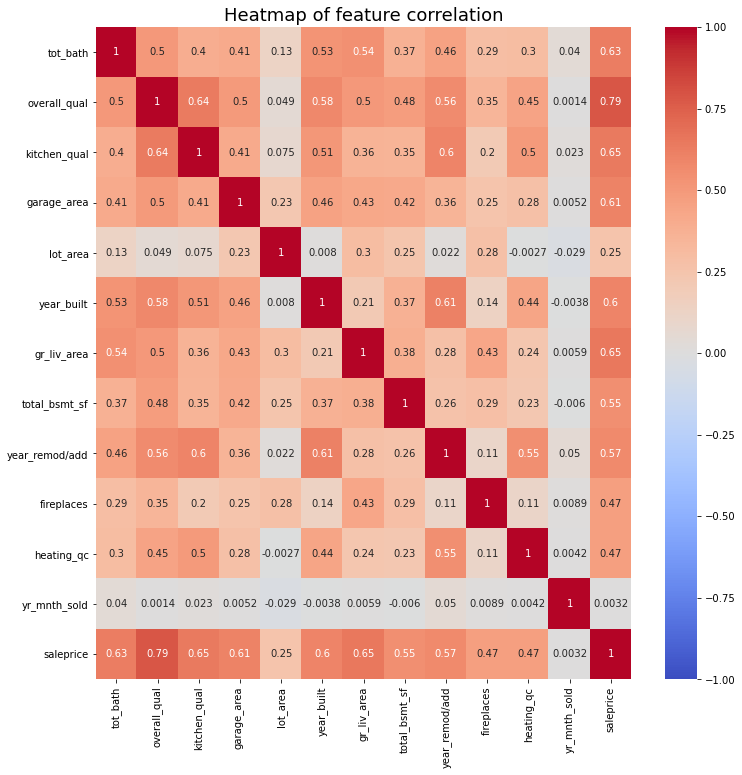

In [1482]:
heat_features = [ 'tot_bath', 'overall_qual', 'kitchen_qual', 'garage_area', 'lot_area', 'year_built',
            'gr_liv_area', 'total_bsmt_sf', 'year_remod/add', 'fireplaces', 'heating_qc',
            'yr_mnth_sold', 'saleprice']
heat_df = train[heat_features]
plt.figure(figsize = (12,12))
sns.heatmap(heat_df.corr(), cmap = 'coolwarm', vmin = -1, vmax = 1, annot = True)
plt.title('Heatmap of feature correlation', fontsize = 18);

In [1483]:
# Creating poly fit
poly = PolynomialFeatures(include_bias = False)
poly.fit(X_train)
train_poly = poly.transform(X_train)
test_poly = poly.transform(X_test)
submit_poly = poly.transform(X_submit)
# Scaling dependent variables
ss = StandardScaler()
ss.fit(train_poly)
train_poly_sc = ss.transform(train_poly)
test_poly_sc = ss.transform(test_poly)
submit_poly_sc = ss.transform(submit_poly)
poly_columns = poly.get_feature_names(X_train.columns)
poly_df = pd.DataFrame(data = train_poly_sc, columns = poly_columns)
submit_df = pd.DataFrame(data = submit_poly_sc, columns = poly_columns)
test_df = pd.DataFrame(data = test_poly_sc, columns = poly_columns)

In [1484]:
# Creating Baseline
baseline_pred = [y_train.mean() for _ in y_train]
print(f'Baseline train r2: {r2_score(y_train, baseline_pred)}')
print(f'Baseline train RMSE: {np.sqrt(mean_squared_error(y_train, baseline_pred))}')
baseline_pred = [y_train.mean() for _ in y_test]
print(f'Baseline test r2: {r2_score(y_test, baseline_pred)}')
print(f'Baseline test RMSE: {np.sqrt(mean_squared_error(y_test, baseline_pred))}')

Baseline train r2: 0.0
Baseline train RMSE: 60462.07041888974
Baseline test r2: -0.0024935466430497932
Baseline test RMSE: 57026.76120508717


**Interpretation:** The baseline performs very poorly across both metrics. The baseline r2 for the train data will always be 0 because when substituting the mean for the predictions in the r2 formula, the fraction becomes a 1 making the r2 0. If a model cannot be created that beats the baseline, better data will have to be found to create a predictive model. 

In [1485]:
lm = LinearRegression()
# Checking for overfit
cross_val_score(lm, train_poly_sc, y_train, cv = 4)

array([0.71319141, 0.88475109, 0.83917156, 0.87609651])

**Interpretaion:** It is likely based on this cross val score that my initial model will be overfit. There is a fairly large variance across the 4 scores.

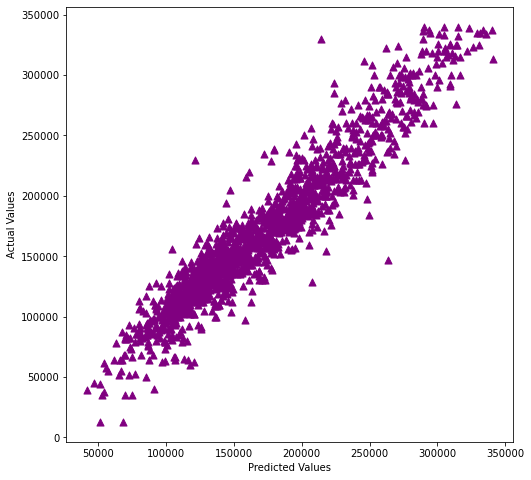

train r2:  0.9070189707693361
test r2: 0.8369209357939293
train RMSE:  18436.57266138978
test RMSE: 23000.486350425344


In [1486]:
# Submit this model 
lm = LinearRegression()
y = y_train
lm.fit(train_poly_sc, y)
predictions = lm.predict(train_poly_sc)
score = lm.score(train_poly_sc,y)
test_pred = lm.predict(test_poly_sc)
submission = lm.predict(submit_poly_sc)
test_score = r2_score(y_test, test_pred)
# Plot the model
plt.figure(figsize=(8,8))
plt.scatter(predictions, y, s = 50, color = 'purple', marker = '^')
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

print('train r2: ', score)
print('test r2:', test_score)
print('train RMSE: ', np.sqrt(mean_squared_error(y, predictions)))
print('test RMSE:', np.sqrt(mean_squared_error(y_test, test_pred)))

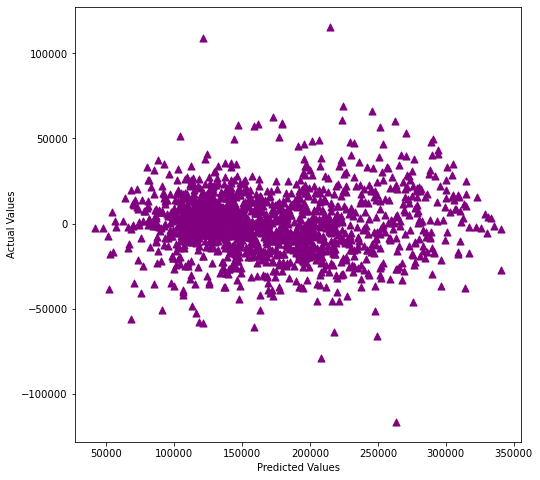

In [1487]:
# Scatterplot of residuals
plt.figure(figsize=(8,8))
plt.scatter(predictions, y_train-predictions, s = 50, color = 'purple', marker = '^')
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

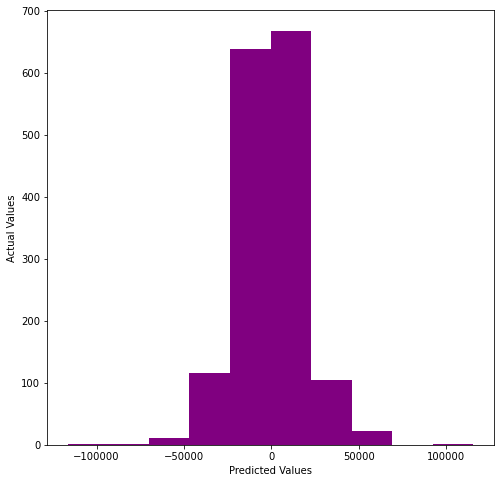

In [1488]:
# Histogram of residuals
plt.figure(figsize=(8,8))
plt.hist( y-predictions, color = 'purple')
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

**Conclusions:** At first glance this model performs well on the training data. The r2 value of .91 means that 91% of the variation in the dependent variable is explained by the model. The histogram of the residuals shows a normal distribution, and the scatterplot follows no clear pattern. These are all good signs, but when looking at how the model performs on test data, it seems to be overfit. The difference in r2 between training and testing data suggests that the model will do poorly when modeling unseen data. One culprit of the overfit could be the large number of features. The polynomial transform makes a significantly larger amount of features that could be insignificant and overfit to the data. I will use regularization to reduce the number of features in the model.

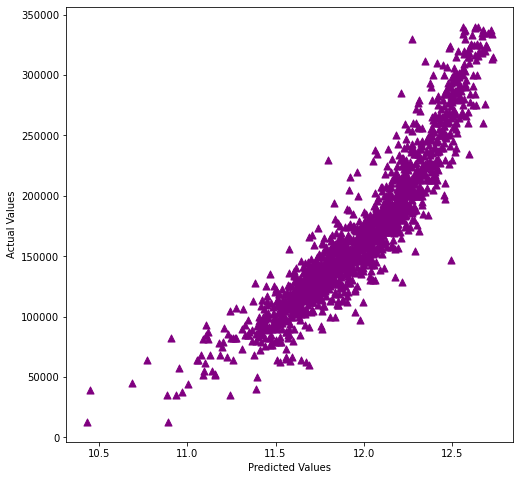

train score:  0.8737892922915242
test score: 0.8409403898327187
train RMSE:  19321.989648782263
test RMSE: 23808.66299265113


In [1489]:
rid = Ridge(alpha = .5)
rid.fit(train_poly_sc, np.log(y_train))
rid_train = rid.predict(train_poly_sc)
rid_train_score = r2_score(np.log(y_train), rid_train)
rid_test = rid.predict(test_poly_sc)
rid_submit = rid.predict(submit_poly_sc)
rid_test_score = r2_score(np.log(y_test), rid_test)
# Plot the model
plt.figure(figsize=(8,8))
plt.scatter(rid_train, y, s = 50, color = 'purple', marker = '^')
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

print('train score: ', rid_train_score)
print('test score:', rid_test_score)
print('train RMSE: ', np.sqrt(mean_squared_error(y_train, np.exp(rid_train))))
print('test RMSE:', np.sqrt(mean_squared_error(y_test, np.exp(rid_test))))

**Interpretation:** The ridge regression is definitely less overfit than the plain linear regession. It performs worse on the training data, but because it performs better on the test data, it will likely do a better job predicting unseen data.

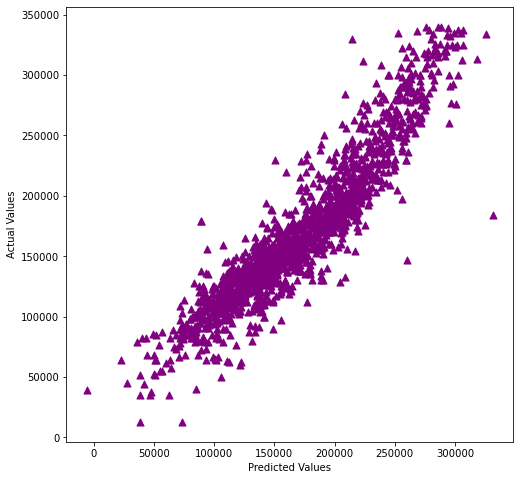

train score:  0.8614006335503228
test score: 0.8088409248999303


In [1490]:
las = Lasso(alpha = .1, tol = .1)
las.fit(train_poly_sc, y_train)
las_train_score = las.score(train_poly_sc, y_train)
las_train = las.predict(train_poly_sc)
las_test = las.predict(test_poly_sc)
las_submit = las.predict(submit_poly_sc)
las_test_score = r2_score(las_test, y_test)
# Plot the model
plt.figure(figsize=(8,8))
plt.scatter(las_train, y, s = 50, color = 'purple', marker = '^')
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

print('train score: ', las_train_score)
print('test score:', las_test_score)

**Interpretation:** The Lasso model has both higher varance and higher bias than the other two models. Because of this I will not use this model. I will use Lasso to remove insignificant features, which should reduce my overfit. 

In [1491]:
# Lasso Coef function from regularization lesson
def lasso_coefs(X, Y, alphas):
    coefs = []
    lasso_reg = Lasso(tol = .1)
    for a in alphas:
        lasso_reg.set_params(alpha=a)
        lasso_reg.fit(X, Y)
        coefs.append(lasso_reg.coef_)
        
    return coefs

In [1492]:
# Using Lasso to select significant features
l_alphas = np.arange(0.01, 15.0, 0.05)
l_coefs = lasso_coefs(train_poly_sc, y, l_alphas)
poly_coefs_df = pd.DataFrame(l_coefs, columns = poly_columns)
poly_coefs_df['alpha'] = l_alphas
columns_to_filter_out = [col for col, value in poly_coefs_df\
                         .iloc[poly_coefs_df.index.max()]\
                              .iteritems() if not value]

poly_features = [col for col in poly_columns if col not in columns_to_filter_out]

In [1493]:
# Finding best alpha for lasso
lasso_cv = LassoCV(cv = 10).fit(train_poly_sc,y_train)

print('best alpha:', lasso_cv.alpha_)
print('score:', lasso_cv.score(train_poly_sc,y_train))

/Users/nperry725/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 626426702.9510498, tolerance: 522081501.0039631
  model = cd_fast.enet_coordinate_descent_gram(
/Users/nperry725/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 613481472.8916016, tolerance: 522081501.0039631
  model = cd_fast.enet_coordinate_descent_gram(
/Users/nperry725/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1172062876.3458252, tolerance: 522081501.0039631
  model = cd_fast.enet_coordinate_descent_gram(
/Users/nperry725/opt/anaconda3/lib/python3.8/

/Users/nperry725/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 533283387.95544434, tolerance: 512108695.8582217
  model = cd_fast.enet_coordinate_descent_gram(
/Users/nperry725/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 709252905.2977905, tolerance: 523620947.82604736
  model = cd_fast.enet_coordinate_descent_gram(
/Users/nperry725/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 525931082.2523804, tolerance: 523620947.82604736
  model = cd_fast.enet_coordinate_descent_gram(
/Users/nperry725/opt/anaconda3/lib/python3.

best alpha: 258.4873733075516
score: 0.889759791548522


/Users/nperry725/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 760771628.9952393, tolerance: 512519896.3554007
  model = cd_fast.enet_coordinate_descent_gram(
/Users/nperry725/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 613560480.5009766, tolerance: 512519896.3554007
  model = cd_fast.enet_coordinate_descent_gram(
/Users/nperry725/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 566659127.666626, tolerance: 512519896.3554007
  model = cd_fast.enet_coordinate_descent_gram(
/Users/nperry725/opt/anaconda3/lib/python3.8/si

In [1494]:
# Finding final columns
new_lasso = Lasso(alpha = lasso_cv.alpha_)
new_lasso.fit(train_poly_sc, y_train)
final_columns = [col for col, coef in zip(poly_columns, new_lasso.coef_) if coef]

/Users/nperry725/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4309975260.654175, tolerance: 572111096.6365192
  model = cd_fast.enet_coordinate_descent(


In [1495]:
# Performing final regression based on final columns
lreg = LinearRegression(n_jobs = -1)
X_final = poly_df[final_columns]
y_final = y_train
X_final_submit = submit_df[final_columns]
test_final = test_df[final_columns]

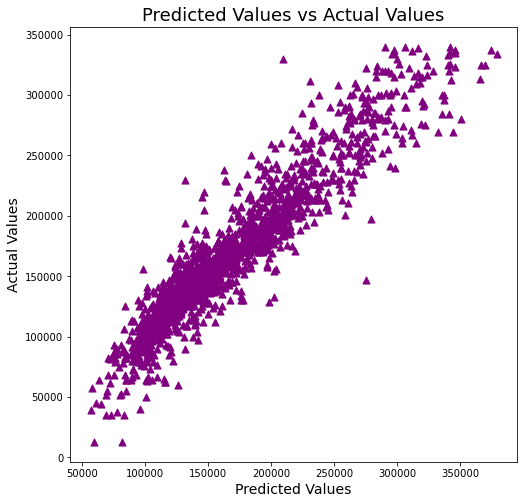

train score:  0.8439266842060053
test score: 0.8241058795177488
train RMSE:  20695.209388229072
test RMSE: 25005.6354743966


In [1496]:
# Making final Linear model
lreg.fit(X_final, np.log(y_final))
predictions = lreg.predict(X_final)
score = lreg.score(X_final,np.log(y_final))
test_pred = lreg.predict(test_final)
submission = lreg.predict(X_final_submit)
test_score = r2_score(test_pred, np.log(y_test))
# Plot the model
plt.figure(figsize=(8,8))
plt.scatter(np.exp(predictions), y_final, s = 50, color = 'purple', marker = '^')
plt.xlabel("Predicted Values", fontsize = 14)
plt.ylabel("Actual Values", fontsize = 14)
plt.title('Predicted Values vs Actual Values', fontsize = 18)
plt.show()

print('train score: ', score)
print('test score:', test_score)
print('train RMSE: ', np.sqrt(mean_squared_error(y_train, np.exp(predictions))))
print('test RMSE:', np.sqrt(mean_squared_error(y_test, np.exp(test_pred))))

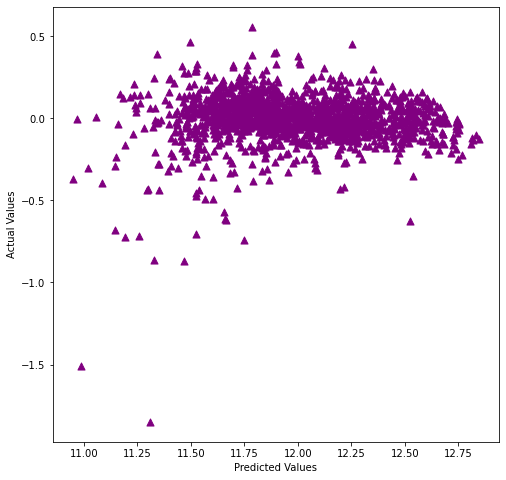

In [1497]:
# Scatterplot of residuals
plt.figure(figsize=(8,8))
plt.scatter(predictions, np.log(y_final)-predictions, s = 50, color = 'purple', marker = '^')
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

In [1498]:
# Creating submission
submit = pd.DataFrame()
submit['id'] = test['id']
submit['SalePrice'] = np.exp(submission)

In [1499]:
# Exporting submission as csv
submit.to_csv('./submission.csv', index = False)

In [1500]:
# Making dictionary to display coefficients
coeffs = {col:round(coefficient,5) for col,coefficient in zip(final_columns, lreg.coef_)}
coeffs

{'year_built': 0.05402,
 'total_bsmt_sf': 2.23997,
 'yr_mnth_sold': 24.20454,
 'tot_bath kitchen_qual': 0.00026,
 'tot_bath total_bsmt_sf': 0.05134,
 'overall_qual garage_area': 0.0817,
 'overall_qual lot_area': 0.15366,
 'overall_qual gr_liv_area': 0.0077,
 'overall_qual total_bsmt_sf': 0.03124,
 'overall_qual fireplaces': 0.03105,
 'kitchen_qual garage_area': -0.01039,
 'kitchen_qual gr_liv_area': 0.00186,
 'kitchen_qual total_bsmt_sf': 0.0579,
 'kitchen_qual fireplaces': 0.01013,
 'garage_area lot_area': -0.04392,
 'lot_area^2': -0.04591,
 'lot_area year_built': -0.49745,
 'lot_area total_bsmt_sf': -0.00506,
 'lot_area year_remod/add': 0.46198,
 'year_built gr_liv_area': 0.13094,
 'year_built total_bsmt_sf': -1.8603,
 'year_built year_remod/add': 0.09078,
 'gr_liv_area total_bsmt_sf': -0.25936,
 'gr_liv_area heating_qc': 0.06465,
 'total_bsmt_sf^2': 0.00909,
 'total_bsmt_sf year_remod/add': -0.29479,
 'total_bsmt_sf heating_qc': -0.03137,
 'fireplaces^2': -0.00031,
 'yr_mnth_sold^2'

**Conclusions:** The model with features selected by Lasso performs the best. It has a smaller R2 value on the training data than the original linear regression, but performs better on the test data. This means I can reasonably conclude that this model will perform better on unknown data. Polynomial transforms create a large amount of features that can clutter the model. Using Lasso to narrow them down makes the analysis more understandable and useful on new data. The poly transform can make it difficult to see the effect of an individual feature so I will do further analysis to see.

In [1501]:
# Defining function to estimate effect of feature on model as if it were linear
def est_slope(col_name):
    col_preds = []
    # Averaging across the range of -2 std from mean to +2 std from mean
    for sdevs in [-2, 2]:
        #making prediction rows with every column but yr_mnth_sold being at mean
        col_std = [[train[col].mean() if col != col_name
                    else train[col].mean() + sdevs * train[col].std() for col in features]]
        #manipulating row to fit model
        col_poly = poly.transform(col_std)
        col_sc = ss.transform(col_poly)
        col_df = pd.DataFrame(data = col_sc, columns = poly_columns)
        col_final = col_df[final_columns]
        col_p = lreg.predict(col_final)
        col_preds.append(np.exp(col_p[0]))
    return (col_preds[1] - col_preds[0])/4

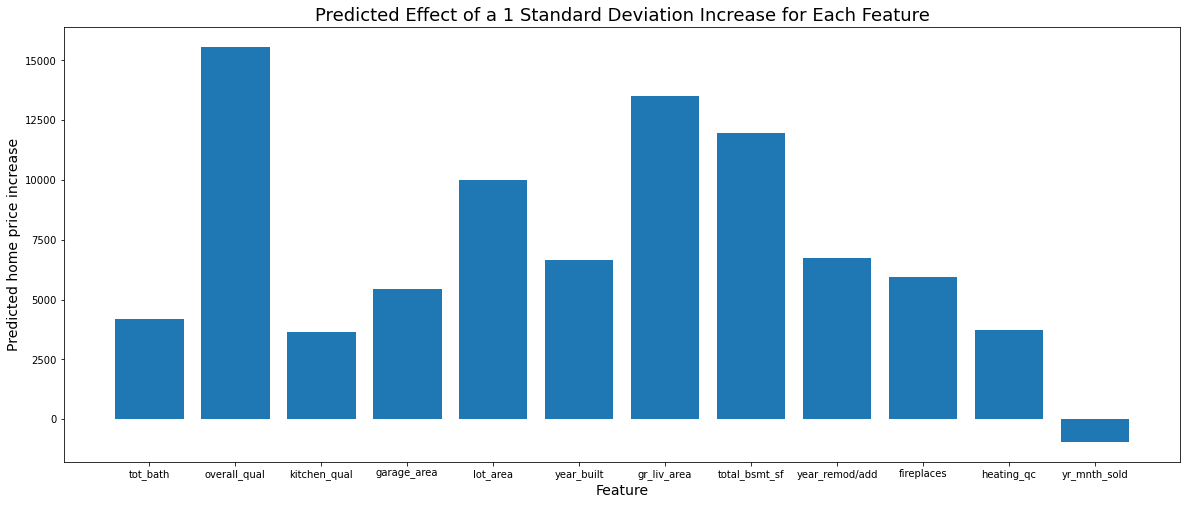

In [1502]:
plt.figure(figsize = (20, 8))
est_slopes = [est_slope(col) for col in features]
plt.bar(features, est_slopes)
plt.title('Predicted Effect of a 1 Standard Deviation Increase for Each Feature', fontsize = 18)
plt.xlabel('Feature', fontsize = 14)
plt.ylabel('Predicted home price increase', fontsize = 14);

**Interpretaion:** This graph estimates the effect of a 1 standard deviation increase in each feature on the predicted home value. This graph does a decent job of showing the general effect of each feature, but because the model is polynomial and not linear, it doesn't tell the whole story. Positive standouts on this graph include overall quality, above ground living area, basement square footage and lot area. The negative standout is time sold with a negative value. This conflicts with the generally accepted view that home prices increase over time. I will further analyze this feature.

In [1503]:
# Creating time series to show affect of sale date on final model
time_preds = []
yr_month = []
# iterating over months in range(yr_mnth_sold * 12)
for time in range (24072,24132):
    #making prediction rows with every column but yr_mnth_sold being at mean
    time_std = [[train[col].mean() if col != 'yr_mnth_sold'
                else time/12 for col in features]]
    #manipulating row to fit model
    time_poly = poly.transform(time_std)
    time_sc = ss.transform(time_poly)
    time_df = pd.DataFrame(data = time_sc, columns = poly_columns)
    time_final = time_df[final_columns]
    time_p = lreg.predict(time_final)
    time_preds.append(np.exp(time_p[0]))
    yr_month.append(time/12)

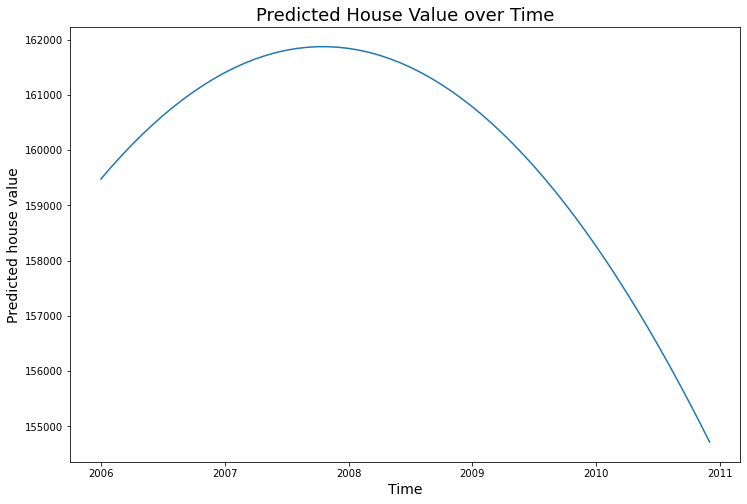

In [1504]:
plt.figure(figsize = (12,8))
plt.plot(yr_month, time_preds)
plt.xlabel('Time', fontsize = 14)
plt.ylabel('Predicted house value', fontsize = 14)
plt.title('Predicted House Value over Time', fontsize = 18);

**Interpretation:** This chart shows the predicted effect of time sold on house price, with all other features being set to thier mean value. This plot shows a steep drop in my predicted house value starting in 2008. Normally I would expect house value to constantly increase with time, but this drop coincides with the US housing market crash. This leads me to conclude that while the model does a good job predicting data in the timeframe it was fit on, it would perform poorly when predicting future data.